## **Text Feature Engineering and Modelling**
Done by Wong Wen Bing 230436M

In [3]:
# pip install scikit-learn seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv('230436M_cleaned_data.csv')
df.head()

,Unnamed: 0,description,species,text_length,cleaned_text
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...
1,1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...
4,4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...


In [34]:
y=df['species']
x=df['cleaned_text']
n_classes = y.shape[0]

In [35]:
display(x.shape)
display(y.shape)

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

(611,)

(611,)

#### **Feature Engineering**   
There are different types of features that can be done, we will be using a mix of vectorizers as comparison. A base model will be trained to examine this.




In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english', ngram_range=(1,2))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (488, 9711)
test: (123, 9711)

features: ['ability' 'able' 'able imitate' ... 'zhao renhui' 'zoonosis'
 'zoonosis singapore']
      


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X_train_tv=tv.fit_transform(X_train)
X_test_tv=tv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_tv.toarray().shape}
test: {X_test_tv.toarray().shape}

features: {tv.get_feature_names_out()}
      """)


training: (488, 9711)
test: (123, 9711)

features: ['ability' 'able' 'able imitate' ... 'zhao renhui' 'zoonosis'
 'zoonosis singapore']
      


##### **Usage of A Base Model for testing**
We will use a base model, Logistic Regression to decide which of the vectorizers or bag of words features can produce the most results. T

In [61]:
from sklearn.linear_model import LogisticRegression


#train
def vectorise_data(X_train_cv,X_test_cv):
    lr=LogisticRegression(solver='lbfgs')
    lr.fit(X_train_cv, y_train)
    y_pred_cv=lr.predict(X_test_cv)
    accuracy=accuracy_score(y_test, y_pred_cv)
    return accuracy

print(f'''
Model: Count Vectorizer
Accuracy: {vectorise_data(X_train_cv, X_test_cv)} 
=================================================================================================

Model: Tfidf Vectorizer
Accuracy: {vectorise_data(X_train_tv, X_test_cv)}
''')



Model: Count Vectorizer
Accuracy: 0.9186991869918699 

Model: Tfidf Vectorizer
Accuracy: 0.9105691056910569



#### **Modelling**
There will be a number of models tested.

1. Logistic Regression
2. Naives Bayes
3. Support Vector Machine

In [10]:
#importing different models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#list of models
models=[
    {'name': 'Logistic Regression', 
     'model': LogisticRegression(solver='lbfgs')}, 
    {'name': 'Naive Bayes (Multinomial)', 
     'model': MultinomialNB()}, 
    {'name': 'Naive Bayes (GaussianNB)', 
     'model': GaussianNB()}, 
]
results=[]

#printing confusion matrix    
def conf_matrix(y_test, pred_test):    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(4), range(4))
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    

In [11]:
#run models and print classificaton report
from sklearn.metrics import accuracy_score
for modell in models:
    model=modell['model']
    model.fit(X_train_cv, y_train)
    y_pred_cv=model.predict(X_test_cv)
    accuracy=accuracy_score(y_test, y_pred_cv)
    # confusionmatrix = conf_matrix(y_test, y_pred_cv)
    print(f'''
    Model Name: {modell['name']}
    Accuracy: {accuracy:.2f}
    Confusion Matrix: 
    ======================================================================================================
    ''')
    


    Model Name: Logistic Regression
    Accuracy: 0.92
    Confusion Matrix: 
    

    Model Name: Naive Bayes (Multinomial)
    Accuracy: 0.90
    Confusion Matrix: 
    


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

### **Model 1: Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr=OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict_proba(X_test_cv)
y_pred_cv

array([[1.82334630e-01, 7.28220087e-02, 6.30478868e-01, 1.14364493e-01],
       [9.86822298e-01, 3.06573309e-03, 5.69965358e-03, 4.41231507e-03],
       [1.31346430e-05, 9.99955763e-01, 1.96447834e-05, 1.14580412e-05],
       [8.81662642e-04, 1.33816630e-03, 6.61960623e-04, 9.97118210e-01],
       [1.97730566e-01, 1.00535415e-01, 3.35981666e-01, 3.65752352e-01],
       [2.39604247e-01, 9.53961689e-02, 1.60152661e-01, 5.04846923e-01],
       [2.39130499e-01, 1.57374637e-01, 2.37496754e-01, 3.65998111e-01],
       [3.29018098e-03, 3.05078175e-03, 2.25549646e-03, 9.91403541e-01],
       [1.32632483e-02, 9.55548663e-01, 1.09853124e-02, 2.02027760e-02],
       [1.33998878e-03, 3.68463327e-03, 9.92057684e-01, 2.91769382e-03],
       [9.97664003e-01, 1.20390515e-03, 6.48738357e-04, 4.83353858e-04],
       [2.13628832e-02, 9.60161670e-01, 1.30473411e-02, 5.42810514e-03],
       [7.87417467e-02, 2.36713112e-02, 8.59190964e-01, 3.83959779e-02],
       [2.05011769e-01, 1.06436195e-01, 4.62626102e

In [45]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(123, 4)

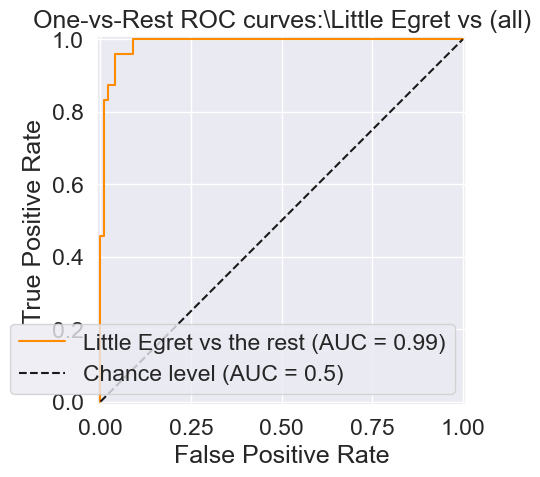

In [50]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
class_of_interest="Little Egret"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_cv[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\{class_of_interest} vs (all)",
)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[33,  0,  0,  3],
       [ 3, 26,  0,  1],
       [ 0,  0, 33,  0],
       [ 2,  0,  0, 22]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.87      0.92      0.89        36
Collared Kingfisher       1.00      0.87      0.93        30
         Javan Myna       1.00      1.00      1.00        33
       Little Egret       0.85      0.92      0.88        24

           accuracy                           0.93       123
          macro avg       0.93      0.92      0.93       123
       weighted avg       0.93      0.93      0.93       123



Saving the model

In [51]:
import pickle
with open(f'Logistic Regression.pkl', 'wb') as f1: 
    pickle.dump(nb, f1)

### **Model 2: Naives Bayes**

In [15]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[34,  0,  1,  1],
       [ 0, 27,  2,  1],
       [ 0,  1, 32,  0],
       [ 3,  1,  2, 18]])

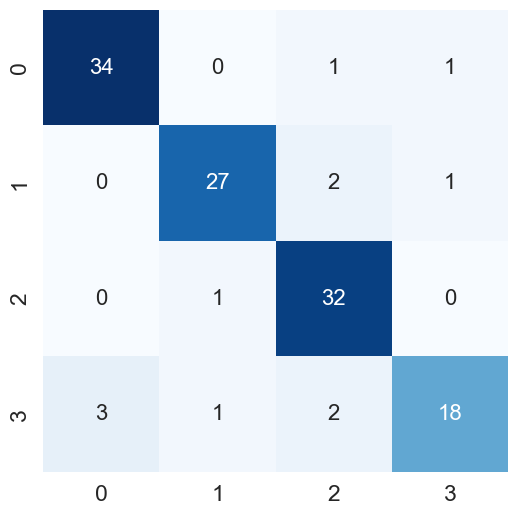

In [17]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(4), range(4))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Ploting the confusion matrix
conf_matrix(y_test, y_pred_cv)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.92      0.94      0.93        36
Collared Kingfisher       0.93      0.90      0.92        30
         Javan Myna       0.86      0.97      0.91        33
       Little Egret       0.90      0.75      0.82        24

           accuracy                           0.90       123
          macro avg       0.90      0.89      0.89       123
       weighted avg       0.90      0.90      0.90       123



Support Vector Machine


In [19]:
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[35,  1,  0,  0],
       [ 3, 26,  0,  1],
       [ 0,  0, 33,  0],
       [ 4,  0,  0, 20]])

In [21]:
from sklearn.metrics import classification_report
svm_results = classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret'])